In [1]:
# Title:  Spambase Dataset

# INSTALL AND LOAD PACKAGES ################################

# Install pacman if you don't have it (uncomment next line)
# install.packages("pacman")

# Install and/or load packages with pacman
pacman::p_load(  # Use p_load function from pacman
  GGally,        # Plotting option
  magrittr,      # Pipes
  pacman,        # Load/unload packages
  rio,           # Import/export data
  tidyverse      # So many reasons
)

In [2]:
# LOAD AND PREPARE DATA ####################################

# Many of the for this course come from the Machine Learning
# Repository at the University of California, Irvine (UCI),
# at https://archive.ics.uci.edu/

# For all three demonstrations of dimensionality reduction,
# we'll use the "Spambase Data Set," which can be accessed
# viahttps://archive.ics.uci.edu/ml/datasets/Spambase

# We'll use the dataset saved in "spambase.data," which is
# the training dataset. This data can be downloaded as a CSV
# file, but you'll need to manually add the ".csv"
# extension. I've saved the CSV file in the R project's data
# folder, with the name "spambase.csv".

# Import data from UCI ML (but you can skip this step)
# df <- as.data.frame(
#   read.csv(
#     url(
#       paste(
#         "https://archive.ics.uci.edu/ml/",
#         "machine-learning-databases/",
#         "spambase//spambase.data",
#         sep = ""
#       )
#     )
#   )
# ) %>%
# as_tibble()

# Import the data
df <-  import("data/spambase.csv") %>%
  as_tibble()  # Save as tibble, which prints better

# Look at the variable names
df %>% names()

[1] "X0"      "X0.64"   "X0.64.1" "X0.1"    "X0.32"   "X0.2"    "X0.3"   
 [8] "X0.4"    "X0.5"    "X0.6"    "X0.7"    "X0.64.2" "X0.8"    "X0.9"   
[15] "X0.10"   "X0.32.1" "X0.11"   "X1.29"   "X1.93"   "X0.12"   "X0.96"  
[22] "X0.13"   "X0.14"   "X0.15"   "X0.16"   "X0.17"   "X0.18"   "X0.19"  
[29] "X0.20"   "X0.21"   "X0.22"   "X0.23"   "X0.24"   "X0.25"   "X0.26"  
[36] "X0.27"   "X0.28"   "X0.29"   "X0.30"   "X0.31"   "X0.33"   "X0.34"  
[43] "X0.35"   "X0.36"   "X0.37"   "X0.38"   "X0.39"   "X0.40"   "X0.41"  
[50] "X0.42"   "X0.43"   "X0.778"  "X0.44"   "X0.45"   "X3.756"  "X61"    
[57] "X278"    "X1"

In [5]:
# Rename variables as A1-A57
colnames(df) <- paste(
  "A",
  1:ncol(df),
  sep = ""
)

In [6]:
# Look at the variable names again
df %>% names()

[1] "A1"  "A2"  "A3"  "A4"  "A5"  "A6"  "A7"  "A8"  "A9"  "A10" "A11" "A12"
[13] "A13" "A14" "A15" "A16" "A17" "A18" "A19" "A20" "A21" "A22" "A23" "A24"
[25] "A25" "A26" "A27" "A28" "A29" "A30" "A31" "A32" "A33" "A34" "A35" "A36"
[37] "A37" "A38" "A39" "A40" "A41" "A42" "A43" "A44" "A45" "A46" "A47" "A48"
[49] "A49" "A50" "A51" "A52" "A53" "A54" "A55" "A56" "A57" "A58"

In [7]:
# Rename the class label as y; change values 0 to "notSpam"
# and 1 to "spam"; convert to factor
df %<>% 
  rename(y = A58) %>%   # Rename class variable as `y`
  mutate(
    y = ifelse(
      y == 0, 
      "NotSpam", 
      "Spam"
    )
  ) %>%
  mutate(y = factor(y))  # Recode class label as factor

In [8]:
# Check the variable `y`; `forcats::fct_count` gives
# frequencies in factor order
df %>% 
  pull(y) %>%  # Return a vector instead of a dataframe
  fct_count()  # Count frequencies in factor order

f,n
<fct>,<int>
NotSpam,2788
Spam,1812


In [9]:
# SPLIT DATA ##############################################

# Some demonstrations will use separate testing and training
# datasets for validation.

# Set random seed for reproducibility in processes like
# splitting the data
set.seed(1)  # You can use any number here

# Split data into training (trn) and testing (tst) sets
df %<>% mutate(ID = row_number())  # Add row ID
trn <- df %>%                      # Create trn
  slice_sample(prop = .70)         # 70% in trn
tst <- df %>%                      # Create tst
  anti_join(trn, by = "ID") %>%    # Remaining data in tst
  select(-ID)                      # Remove id from tst
trn %<>% select(-ID)               # Remove id from trn
df %<>% select(-ID)                # Remove id from df

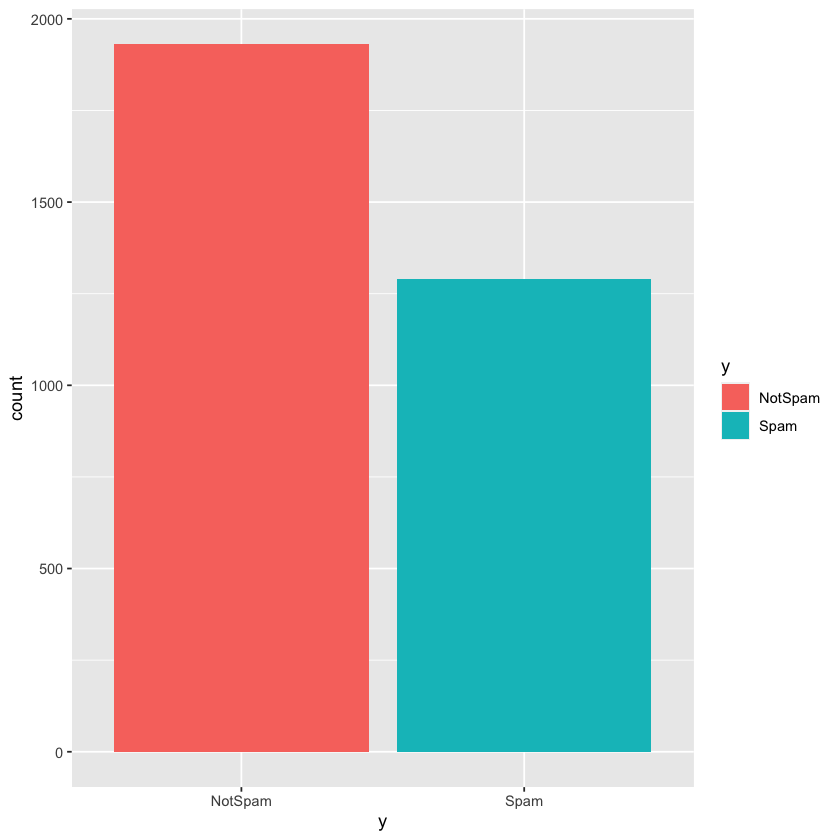

In [10]:
# EXPLORE TRAINING DATA ####################################

# Bar chart of `y`, which is the spam/not class variable
trn %>%
  ggplot() + 
  geom_bar(aes(x = y, fill = y)) 

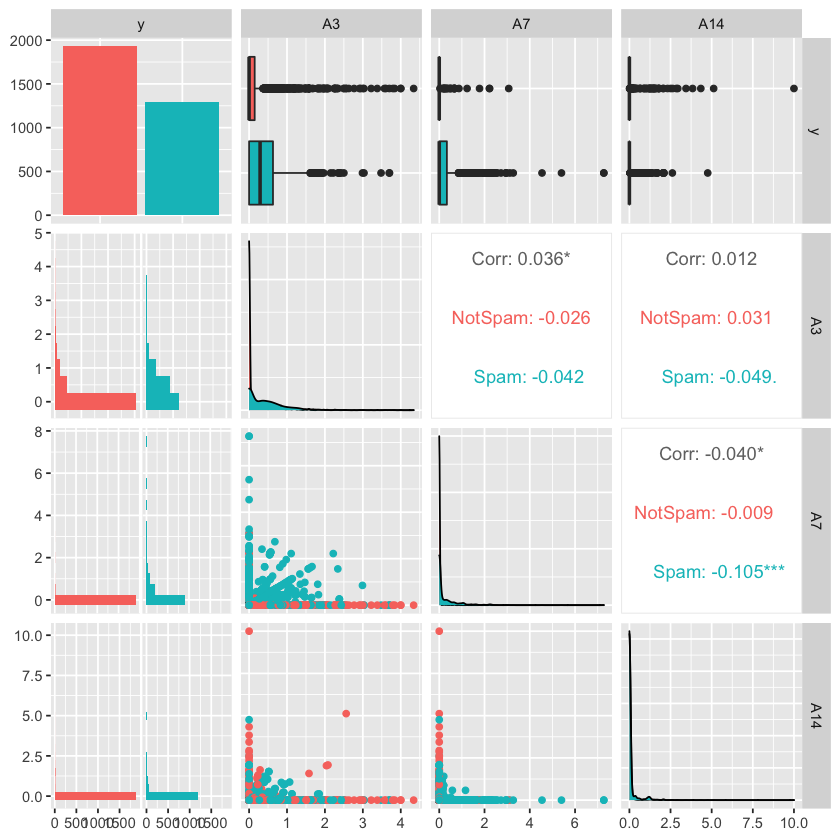

In [11]:
# Randomly select a few variables to plot; focus on `y` in
# the first column and first row
trn %>% 
  select(y, A3, A7, A14)  %>%
  ggpairs(
    aes(color = trn$y),  # Color code is spam vs. not spam
    lower = list(
      combo = wrap(
        "facethist", 
        binwidth = 0.5
      )
    )
  )

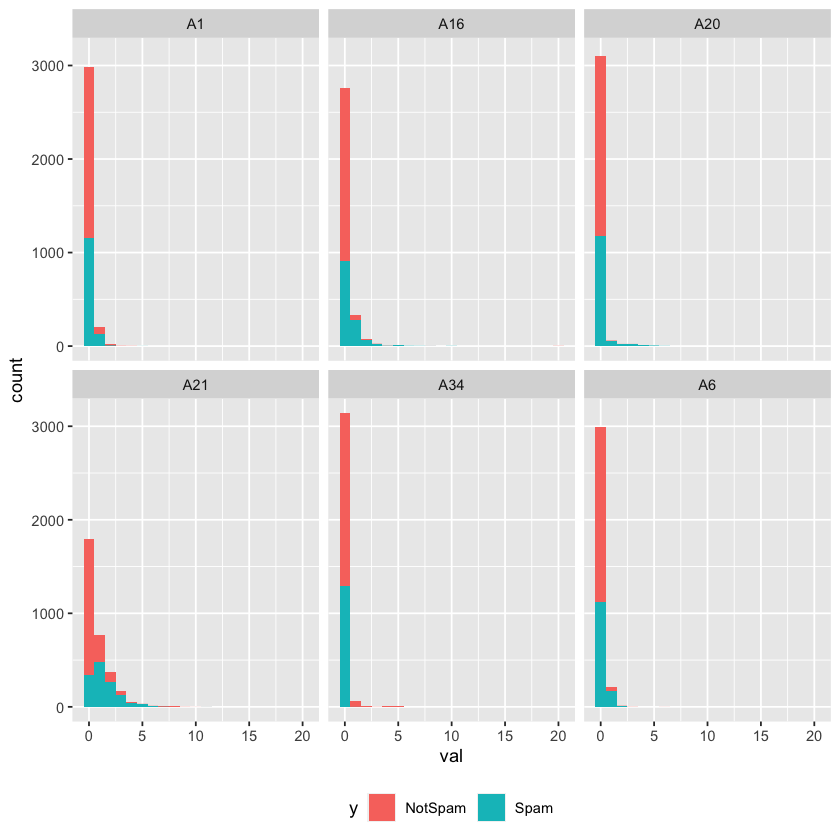

In [12]:
# Stacked histograms of a few variables; note the sparse
# nature of text data
trn %>% 
  select(A1, A6, A16, A20, A21, A34, y) %>% 
  gather(var, val, -y) %>%  # Gather key value pairs
  ggplot(aes(x = val, group = y, fill = y)) +
  geom_histogram(binwidth = 1) +
  facet_wrap(~var, ncol = 3) +
  theme(legend.position = "bottom")

In [13]:
# SAVE DATA ################################################

# Use saveRDS(), which save data to native R formats
df  %>% saveRDS("data/spambase.rds")
trn %>% saveRDS("data/spambase_trn.rds")
tst %>% saveRDS("data/spambase_tst.rds")